In [1]:
# https://nbviewer.jupyter.org/github/barbagroup/CFDPython/blob/master/lessons/04_Step_3.ipynb
%matplotlib inline
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
plt.style.use('ggplot') # use "ggplot" style for graphs

# 1D

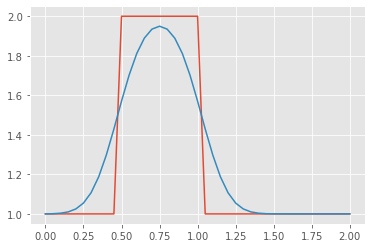

In [2]:
nx = 41 # x-length
dx = 2 / (nx - 1) # step size in x
nt = 20    #the number of timesteps we want to calculate
D = 0.3   #the value of viscosity AKA diffusion constant
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / D #dt is defined using sigma ... more later!


u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = np.ones(nx) #our placeholder array, un, to advance the solution in time

plt.plot(np.linspace(0, 2, nx), u)

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx - 1):
        u[i] = un[i] + D * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
        
plt.plot(np.linspace(0, 2, nx), u)

# 2D

In [3]:
###Run through nt timesteps
def diffuse_2d(u):
    
    temp = u.copy()
    un = u.copy()
    temp[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                    D * dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                    D * dt / dy**2 * 
                    (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    temp[0, :] = 0
    temp[-1, :] = 0
    temp[:, 0] = 0
    temp[:, -1] = 0
    
    return temp

In [4]:
###variable declarations

nx = 31 # length in x
ny = 31 # length in y
nt = 17 # length in time
D = .05 # diffusion constant
dx = 2 / (nx - 1) # step size in x
dy = 2 / (ny - 1) # step size in y
sigma = .25
dt = sigma * dx * dy / D

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.zeros((ny, nx))  # create a 1xn vector of 1's
un = np.zeros((ny, nx))

init = 10

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = init  

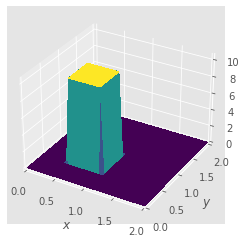

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, init + 0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

0 1
10 2
25 3
50 4


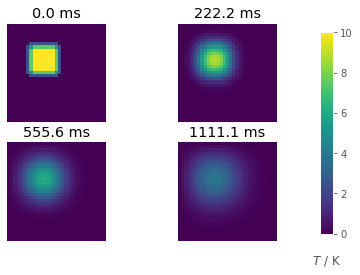

In [6]:
# Number of timesteps
nsteps = 51
# Output 4 figures at these timesteps
mfig = [0, 10, 25, 50]
fignum = 0
fig = plt.figure()
u1 = u.copy()
for m in range(nsteps):
    u1 = diffuse_2d(u1)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u1.copy(), cmap=cm.viridis, vmin=0,vmax=init)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

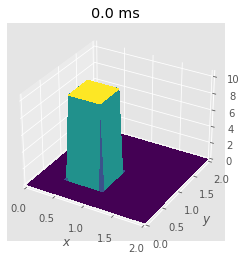

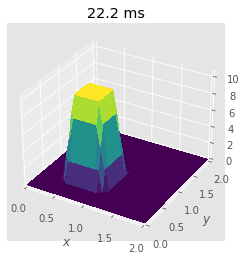

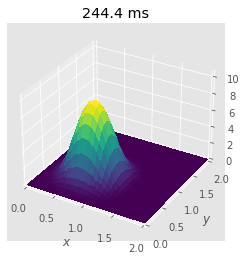

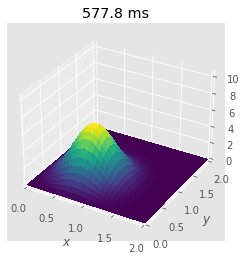

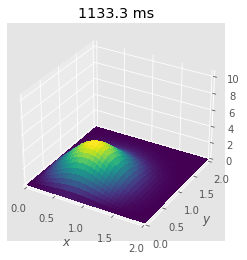

In [7]:
u2 = u.copy()

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u2, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_title('{:.1f} ms'.format(0*dt*1000))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, init + 0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.show()

for n in range(nsteps):

    u2 = diffuse_2d(u2)
    
    if n in mfig:

        fig = plt.figure()
        ax = fig.gca(projection='3d')
        X, Y = np.meshgrid(x, y)
        surf = ax.plot_surface(X, Y, u2, rstride=1, cstride=1, cmap=cm.viridis,
                linewidth=0, antialiased=False)
        
        ax.set_title('{:.1f} ms'.format((n+1)*dt*1000))
        ax.set_xlim(0, 2)
        ax.set_ylim(0, 2)
        ax.set_zlim(0, init + 0.5)

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        plt.show()

# 3D

In [8]:
###Run through nt timesteps
def diffuse_3d(u):

    temp = u.copy()
    un = u.copy()
    temp[1:-1, 1:-1, 1:-1] = (un[1:-1,1:-1, 1:-1] + 
                    D * dt / dx**2 * 
                    (un[1:-1, 2:, 2:] - 2 * un[1:-1, 1:-1, 1:-1] + un[1:-1, 0:-2, 0:-2]) +
                    D * dt / dy**2 * 
                    (un[2:, 1: -1, 2:] - 2 * un[1:-1, 1:-1, 1:-1] + un[0:-2, 1:-1, 0:-2]) +
                    D * dt / dx**2 * 
                    (un[2:, 2:, 1: -1] - 2 * un[1:-1, 1:-1, 1:-1] + un[0:-2, 0:-2, 1:-1]))
    
    temp[0, :, :] = 0
    temp[-1, :, :] = 0
    temp[:, 0, :] = 0
    temp[:, -1, :] = 0
    temp[:, :, 0] = 0
    temp[:, :, -1] = 0

    
    return temp

def diff_plot(x,y,z,u,step=0):
    print('{:.1f} ms'.format(step*dt*1000))
    
    fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
    ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 
    
    #ax.set_title('{:.1f} ms'.format(step*dt*1000))
    ax.set_xlabel(r"x",fontsize=20) # set x-label
    ax.set_ylabel(r"y",fontsize=20) # set y-label
    ax.set_zlabel(r"z",fontsize=20) # set z-label
    ax.set_xlim(xmin=0, xmax=nx)
    ax.set_ylim(ymin=0, ymax=ny)
    ax.set_zlim(zmin=0, zmax=nz)
    ax.view_init(elev=12,azim=120) # set view point
    
    p = ax.scatter(x, y, z, c=u[x,y,z], cmap='jet', alpha = 0.3)
    p.set_clim(0,init)
    cbar = fig.colorbar(p)
    cbar.solids.set(alpha=1)
    
    plt.savefig('Figures/diff eq 3D diffusion %s steps.pdf' % step, bbox_inches='tight')
    plt.savefig('Figures/diff eq 3D diffusion %s steps.png' % step, bbox_inches='tight')
    plt.show() # draw plots

In [9]:
###variable declarations

nx = 31 # length in x
ny = 31 # length in y
nz = 31 # length in z
nt = 17 # length in time
D = 1 # diffusion constant
dx = 2 / (nx - 1) # step size in x
dy = 2 / (ny - 1) # step size in y
dz = 2 / (nz - 1) # step size in z
#dt = dx**2 * dy**2 * dz**2 / (3 * D * (dx**2 + dy**2 + dz**2))
sigma = 1/6
dt = sigma * dx * dy * dz / D


u = np.zeros((nx, ny, nz))  # create a 1xn vector of 1's
un = np.zeros((nx, ny, nz))

init = 2

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=4 && .5<=y<=4 && .5<=z<=4 ) is 2
u[int(1 / dx):int(1.5 / dx), int(1 / dy):int(1.5 / dy), int(1 / dz):int(1.5 / dz)] = init 
print(int(1 / dx))
print(int(1.5 / dx ))
print(dt)

15
22
4.9382716049382706e-05


343
343
343
(31, 31, 31)
0.0 ms


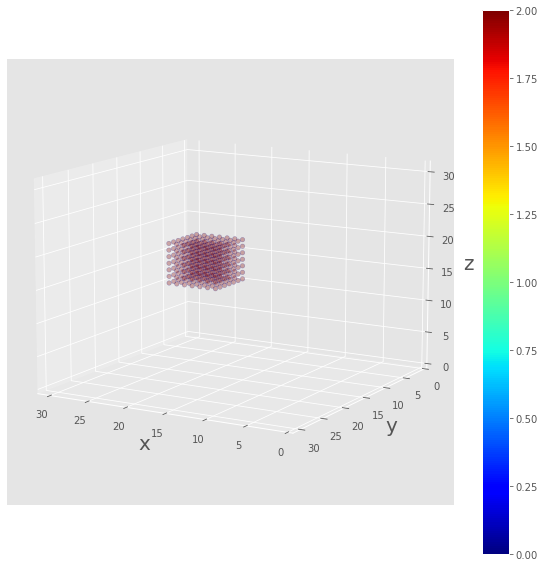

In [10]:
x,y,z = u.nonzero()

#print(u.nonzero())
print(len(x))
print(len(y))
print(len(z))
print(np.shape(u))

diff_plot(x,y,z,u)

0.0 ms


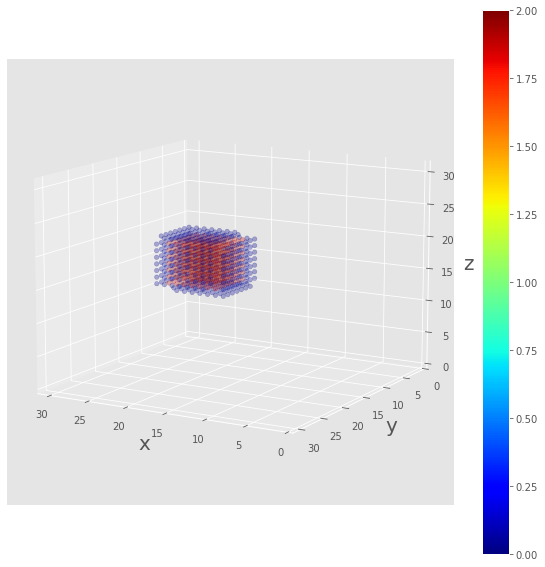

0.1 ms


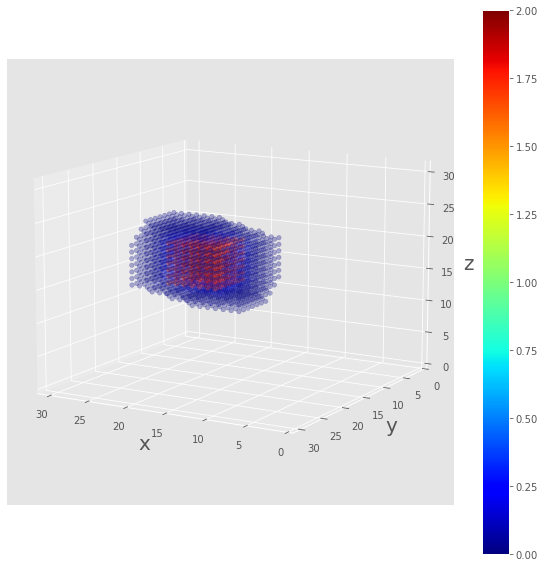

0.3 ms


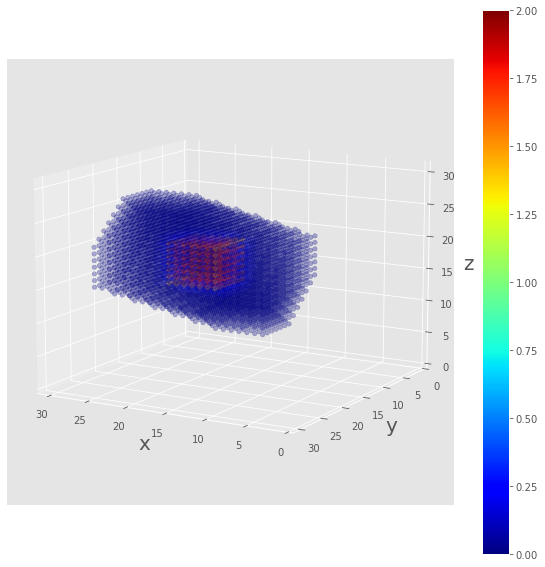

0.4 ms


KeyboardInterrupt: 

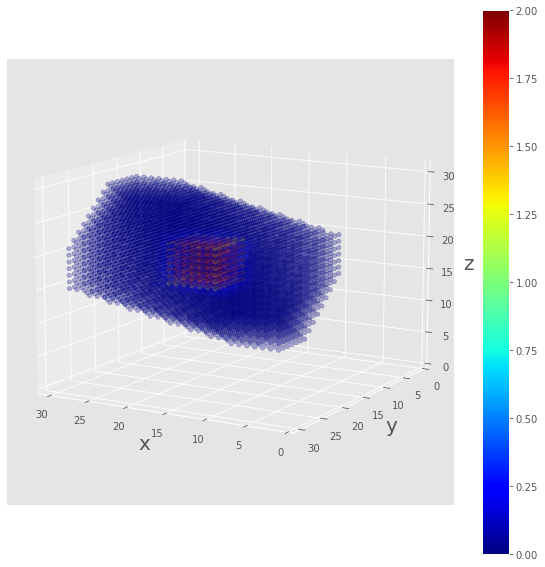

In [11]:
u1 = u.copy()

nsteps = 10001
# Output figures at these timesteps
mfig = [0, 2, 5, 7, 10, 100, 500, 1000, 2000, 5000, 10000]

for n in range(nsteps):
    u1 = diffuse_3d(u1)
    
    if n in mfig:
        x1,y1,z1 = u1.nonzero()
        diff_plot(x1,y1,z1,u1,n+1)

In [12]:
import matplotlib.pylab as pl
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('jet')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='jet_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

0.0 ms
0.1 ms
0.2 ms
0.3 ms
0.5 ms
4.9 ms
24.7 ms
49.4 ms
98.8 ms
246.9 ms
493.8 ms


<Figure size 432x288 with 0 Axes>

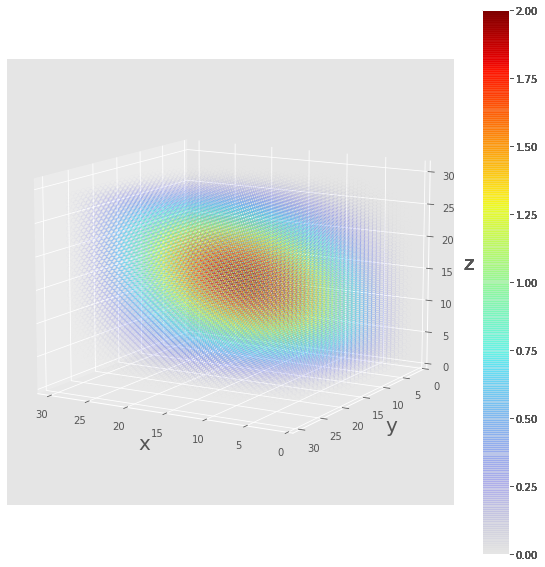

In [14]:
u2 = u.copy()

nsteps = 10001
# Output figures at these timesteps
mfig = [0, 2, 5, 7, 10, 100, 500, 1000, 2000, 5000, 10000]

for n in range(nsteps):
    u2 = diffuse_3d(u2)
    
    if n in mfig:
        print('{:.1f} ms'.format(n*dt*1000))
        x2,y2,z2 = u2.nonzero()
        fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
        ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 

        #ax.set_title('{:.1f} ms'.format((n+1)*dt*1000))
        ax.set_xlabel(r"x",fontsize=20) # set x-label
        ax.set_ylabel(r"y",fontsize=20) # set y-label
        ax.set_zlabel(r"z",fontsize=20) # set z-label
        ax.set_xlim(xmin=0, xmax=nx)
        ax.set_ylim(ymin=0, ymax=ny)
        ax.set_zlim(zmin=0, zmax=nz)
        ax.view_init(elev=12,azim=120) # set view point

        p = ax.scatter(x2, y2, z2, c=u2[x2,y2,z2], cmap='jet_alpha')
        p.set_clim(0,init)
        cbar = fig.colorbar(p)
        
        plt.savefig('Figures/diff eq alpha 3D diffusion %s steps.pdf' % n, bbox_inches='tight')
        plt.savefig('Figures/diff eq alpha 3D diffusion %s steps.png' % n, bbox_inches='tight')
        
        plt.show() # draw plots

0.0 ms
0.1 ms
0.2 ms
0.3 ms
0.5 ms
4.9 ms
24.7 ms
49.4 ms
98.8 ms
246.9 ms
493.8 ms


<Figure size 432x288 with 0 Axes>

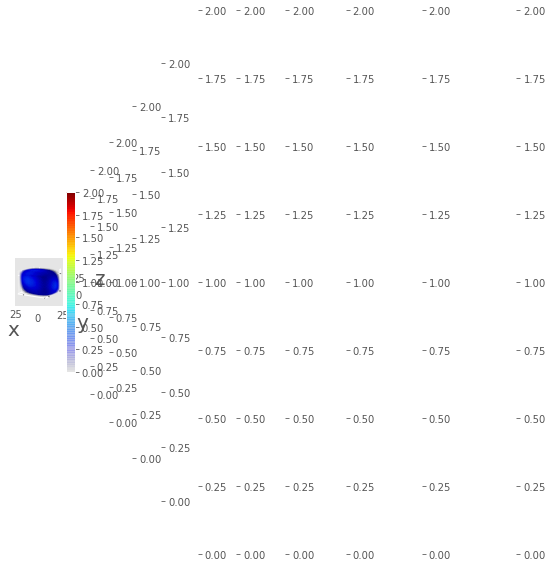

In [17]:
u2 = u.copy()

from celluloid import Camera
fig = plt.figure()
camera = Camera(fig)

nsteps = 10001
# Output figures at these timesteps
mfig = [0, 2, 5, 7, 10, 100, 500, 1000, 2000, 5000, 10000]

fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
camera = Camera(fig)

for n in range(nsteps):
    u2 = diffuse_3d(u2)
    
    if n in mfig:
        print('{:.1f} ms'.format(n*dt*1000))
        x2,y2,z2 = u2.nonzero()
        ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 

        #ax.set_title('{:.1f} ms'.format((n+1)*dt*1000))
        ax.set_xlabel(r"x",fontsize=20) # set x-label
        ax.set_ylabel(r"y",fontsize=20) # set y-label
        ax.set_zlabel(r"z",fontsize=20) # set z-label
        ax.set_xlim(xmin=0, xmax=nx)
        ax.set_ylim(ymin=0, ymax=ny)
        ax.set_zlim(zmin=0, zmax=nz)
        ax.view_init(elev=12,azim=120) # set view point

        p = ax.scatter(x2, y2, z2, c=u2[x2,y2,z2], cmap='jet_alpha')
        p.set_clim(0,init)
        cbar = fig.colorbar(p)
        
        camera.snap()
        
        #plt.savefig('Figures/diff eq alpha 3D diffusion %s steps.pdf' % n, bbox_inches='tight')
        #plt.savefig('Figures/diff eq alpha 3D diffusion %s steps.png' % n, bbox_inches='tight')
        
        #plt.show() # draw plots
        
animation = camera.animate()
animation.save('Figures/diffusion animation.mp4')

0.1 ms


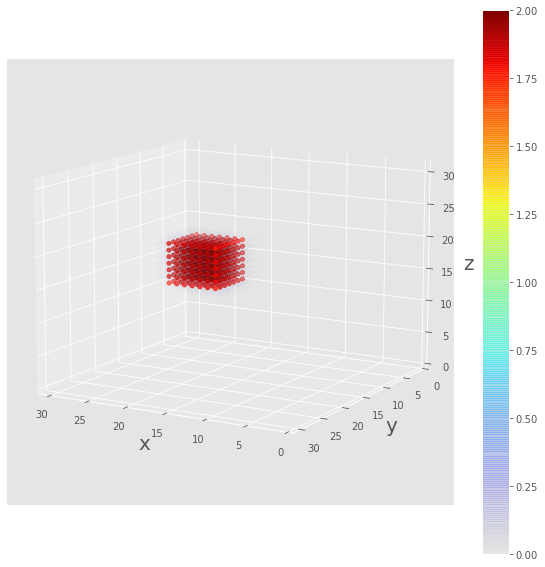

0.3 ms


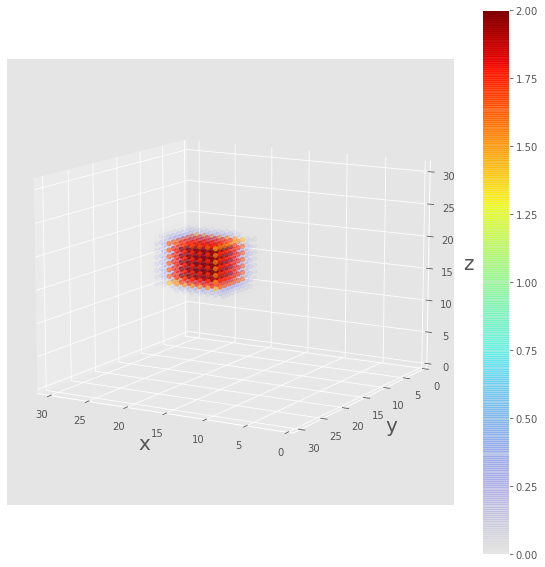

0.6 ms


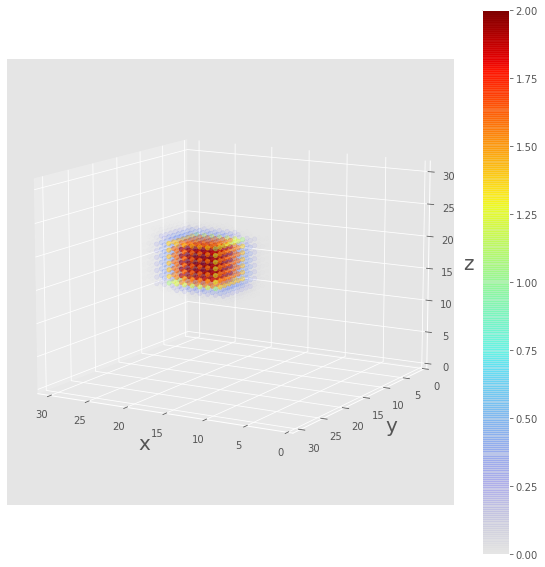

0.8 ms


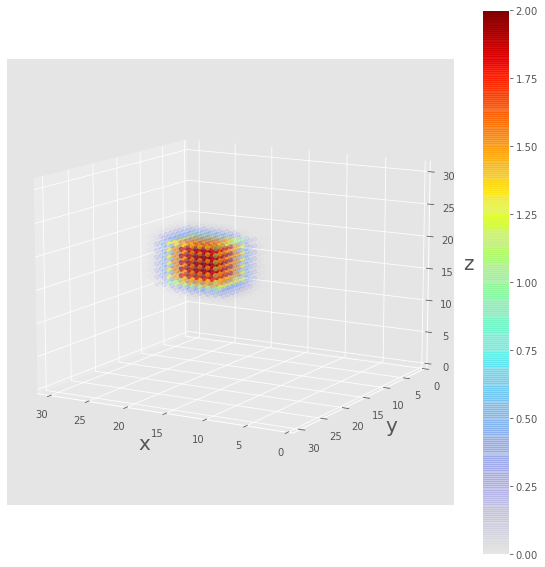

1.1 ms


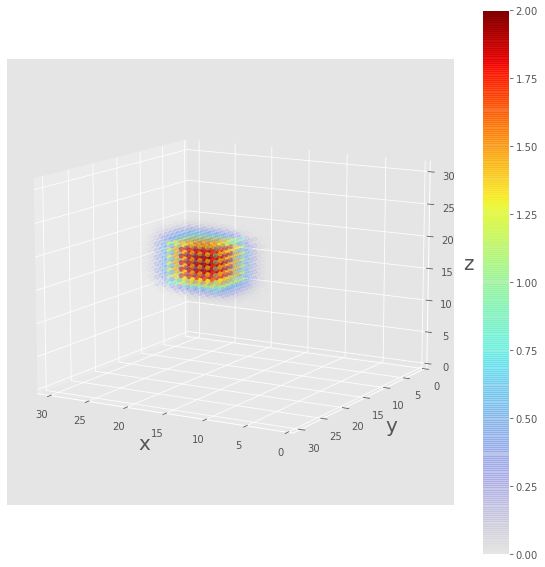

10.1 ms


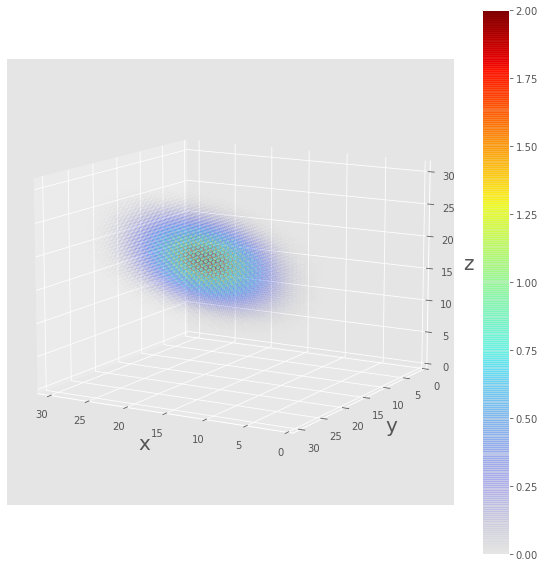

50.1 ms


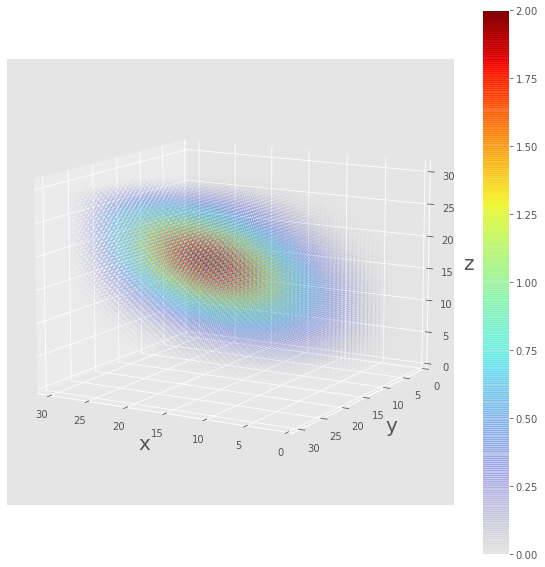

100.1 ms


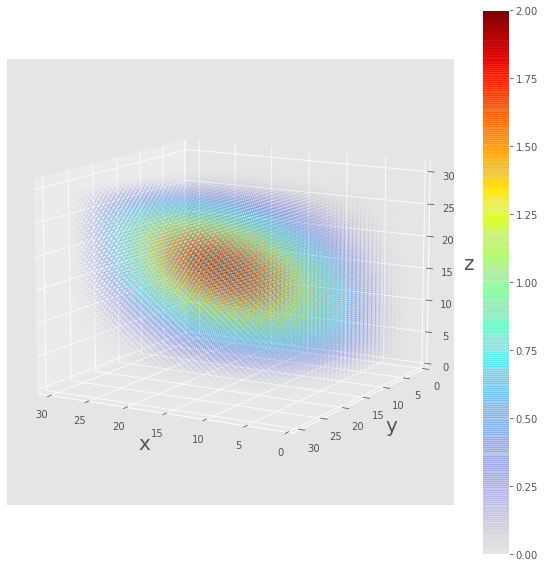

200.1 ms


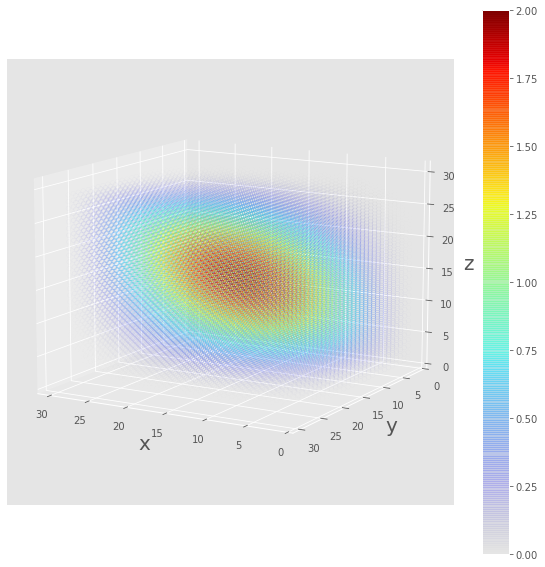

500.1 ms


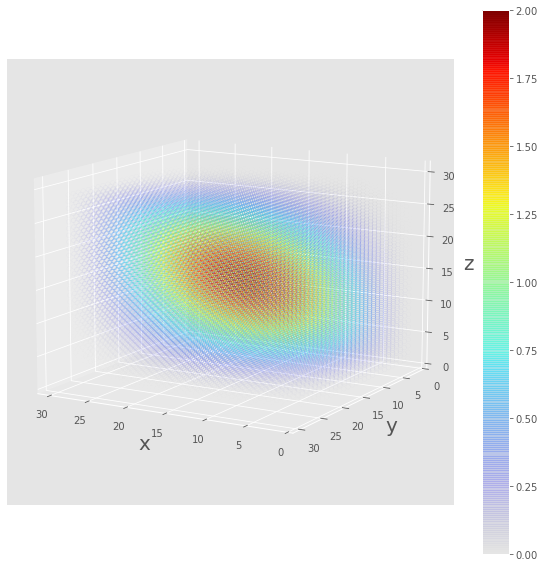

1000.1 ms


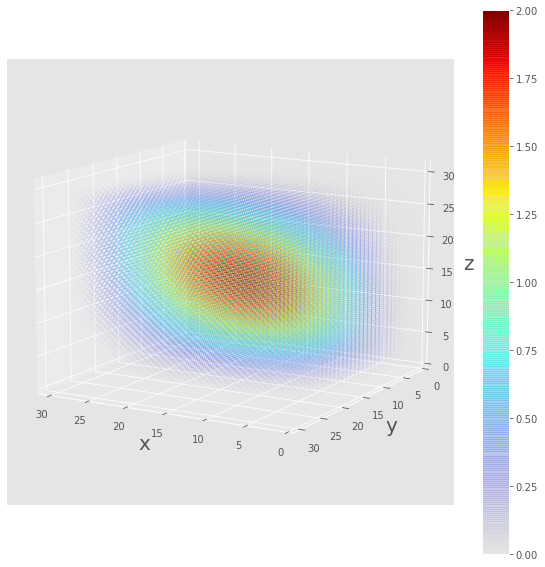

20000.1 ms


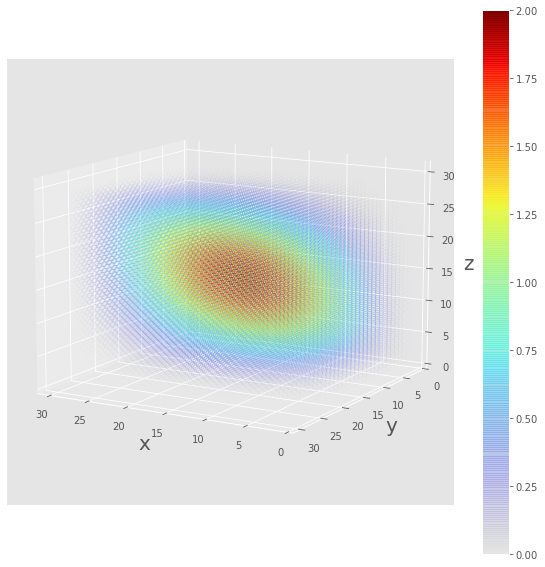

In [24]:
u3 = u.copy()
dt = 0.0001

nsteps = 200001
# Output figures at these timesteps
mfig = [0, 2, 5, 7, 10, 100, 500, 1000, 2000, 5000, 10000, 200000]

for n in range(nsteps):
    u3 = diffuse_3d(u3)
    
    if n in mfig:
        secs = (n+1)*dt*1000
        print('{:.1f} ms'.format((n+1)*dt*1000))
        x3,y3,z3 = u3.nonzero()
        fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
        ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 

        #ax.set_title('{:.1f} ms'.format((n+1)*dt*1000))
        ax.set_xlabel(r"x",fontsize=20) # set x-label
        ax.set_ylabel(r"y",fontsize=20) # set y-label
        ax.set_zlabel(r"z",fontsize=20) # set z-label
        ax.set_xlim(xmin=0, xmax=nx)
        ax.set_ylim(ymin=0, ymax=ny)
        ax.set_zlim(zmin=0, zmax=nz)
        ax.view_init(elev=12,azim=120) # set view point

        p = ax.scatter(x3, y3, z3, c=u3[x3,y3,z3], cmap='jet_alpha')
        p.set_clim(0,init)
        cbar = fig.colorbar(p)
        
        plt.savefig('Figures/diff eq alpha 3D diffusion %s ms bigdt.pdf' % secs, bbox_inches='tight')
        plt.savefig('Figures/diff eq alpha 3D diffusion %s ms bigdt.png' % secs, bbox_inches='tight')
        
        plt.show() # draw plots

[7.61194799e-120 1.00729120e-119 1.17466385e-119 ... 1.17466385e-119
 1.00729120e-119 7.61194799e-120]
